In [115]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [116]:
import pandas as pd
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from textblob import TextBlob
from scipy import stats
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [117]:
# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/NUS/Assignment 1 Topic /cleaned_dataset.csv')
#dataset = pd.read_csv('/content/drive/MyDrive/temp/cleaned_dataset.csv')

# Display the first few rows of the dataset to get an overview
dataset.head()


,stars,useful,restaurant_review,restaurant_name,cleaned_review
0,5.0,2,Amazingly amazing wings and homemade bleu chee...,Fries Rebellion,amazingly amazing wing homemade bleu cheese ri...
1,1.0,4,We arrived a few minutes early for a 7pm reser...,Fries Rebellion,arrive minute early pm reservation ask table h...
2,4.0,1,I wrote this a while ago but never posted it f...,Fries Rebellion,write ago post reason tonight time excellent b...
3,4.0,12,Great cheese steaks and fried pickles...,Fries Rebellion,great cheese steak fry pickle
4,1.0,2,HORRIBLE...To say they forgot our order is an ...,Fries Rebellion,horrible forget order understatement hour craz...


Task 1

In [118]:
unique_restaurant_names = dataset['restaurant_name'].unique()
print(len(unique_restaurant_names))
# Iterate through and print each unique restaurant name
for name in unique_restaurant_names:
    print(name)

2490
Fries Rebellion
Village Whiskey
Jack in the Box
HipCityVeg
Baileys' Range
Stacked Pickle - 96th Street
SPOT Gourmet Burgers
RuSan's Sushi and Seafood
La Mulita
Burger Up
Bareburger - Midtown Village
Seminole Hard Rock Hotel & Casino Tampa
Johnny Rockets
IHOP
Magnolia Grill of New Orleans
SWEGS Kitchen - Mid-City
M3 Restaurant
McDonald's
Top Hog
Freddy's Frozen Custard & Steakburgers
The Blue Duck
Wendy's
Beef 'O' Brady's
500 Degrees
Jackson's Bar & Bistro - Nashville
Dairy Queen
Brunchies - Lutz
The Love
District Donuts Sliders Brew
BlackFinn American Grille
Angys’s Cafe And Ice Cream Parlor
Station 52 Sports Bar & Pizzeria
Dots Diner
M.L.Rose Craft Beer & Burgers - Sylvan Park
Sonic Drive-In
George's Wings
Ted Peter's Famous Smoked Fish
The Pint Room
Yolklore
Pinocchio's Restaurant
Villagio Cinemas
Steak ’n Shake
Vitascope Hall
The Original Habit Burger Grill
Trip's Diner
Chicago Paulies
BFF Cafe
Backspace Bar & Kitchen
Caposey's Whole Works
Tony Luke's
Lucky Belly
Bully's Sports

**USING SAMPLE DATA**

In [119]:
import pandas as pd
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

# Sample data
data = {
    'stars': [5.0, 1.0, 4.0, 4.0],
    'useful': [2, 4, 1, 12],
    'restaurant_review': [
        "Amazingly amazing wings and homemade bleu cheese...",
        "We arrived a few minutes early for a 7pm reser...",
        "I wrote this a while ago but never posted it f...",
        "Great cheese steaks and fried pickles..."
    ],
    'restaurant_name': ["Fries Rebellion"] * 4,
    'cleaned_review': [
        "amazingly amazing wing homemade bleu cheese ri...",
        "arrive minute early pm reservation ask table h...",
        "write ago post reason tonight time excellent b...",
        "great cheese steak fried pickle..."
    ]
}

df = pd.DataFrame(data)
#df = dataset

# Create a dictionary and a corpus
texts = [review.split() for review in df['cleaned_review']]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train an LDA model
num_topics = 3  # Set the number of topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Print the top words for each topic
for topic_id in range(num_topics):
    topic_terms = lda_model.get_topic_terms(topic_id, topn=250)  # Get the top 250 terms for the topic
    topic_words = [dictionary.id2token[term_id] for term_id, _ in topic_terms]  # Convert term IDs to words
    print(f"\n\nTopic {topic_id + 1} Top Words:")
    for word in topic_words:
        # Check if the word contains only letters (no numbers or special characters)
        if word.isalpha():
            print(word)

# Evaluate the coherence score for the model (optional)
coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")




Topic 1 Top Words:
table
arrive
minute
early
reservation
ask
pm
cheese
bleu
excellent
amazing
fried
great
amazingly
homemade
steak
ago
write
reason
wing
time
tonight
post


Topic 2 Top Words:
cheese
post
wing
time
write
tonight
reason
ago
amazing
amazingly
homemade
excellent
bleu
fried
table
great
reservation
steak
early
pm
arrive
minute
ask


Topic 3 Top Words:
cheese
steak
great
fried
pm
ask
reservation
early
minute
arrive
table
homemade
ago
amazingly
reason
excellent
tonight
bleu
time
write
amazing
wing
post
Coherence Score: 0.39921101808084253


In [120]:
# Define a list of positive keywords
positive_keywords = [
  " amazingly", "good", "great", "amazing", "excellent", "fantastic", "love", "loved", "best",
    "awesome", "delicious", "tasty", "yummy", "perfect", "nice", "friendly",
    "recommend", "favourite", "favorite", "wonderful", "happy", "pleased",
    "impressed", "satisfying", "worth", "top", "super", "pleasure", "enjoyed"
]

# Filter reviews with 1 or 2 stars
negative_reviews = dataset[dataset['stars'].isin([1.0, 2.0])]

# Identify reviews with positive keywords in the subset
positive_in_negative = negative_reviews[negative_reviews['cleaned_review'].str.contains('|'.join(positive_keywords), na=False, case=False)]

# Calculate proportions
proportion_positive_in_negative = len(positive_in_negative) / len(negative_reviews)

# Count of reviews with positive keywords in the entire dataset
count_positive_all = dataset[dataset['cleaned_review'].str.contains('|'.join(positive_keywords), na=False, case=False)].shape[0]

# Proportions z-test
from statsmodels.stats.proportion import proportions_ztest

count = [len(positive_in_negative), count_positive_all]
nobs = [len(negative_reviews), dataset.shape[0]]
stat, pval = proportions_ztest(count, nobs)

len(positive_in_negative), proportion_positive_in_negative, stat, pval


(32910, 0.6222230625248152, -119.8159695609116, 0.0)

In [121]:
# Print the results
print("Number of positive keywords in negative reviews:", len(positive_in_negative))
print("Proportion of positive keywords in negative reviews:", proportion_positive_in_negative)
print("Z-test statistic:", stat)
print("P-value:", pval)

Number of positive keywords in negative reviews: 32910
Proportion of positive keywords in negative reviews: 0.6222230625248152
Z-test statistic: -119.8159695609116
P-value: 0.0


Here are the results for Task 1:

Out of the reviews with 1 or 2 stars, 32,910 reviews contained positive keywords.
The proportion of these "positive" reviews within the 1 or 2 star reviews is approximately 62.22%.

TZ-test of approximately -119.82 with p-value of 0.0 indicates  statistically significant difference in the representation of negative sentiment in 1 or 2 star reviews compared to the entire dataset.

This suggests that negative sentiments are indeed underrepresented in 1 or 2 star reviews.


In [122]:
# Define a list of positive keywords in Burger Buster DB
positive_keywords = [
    "amazingly", "good", "great", "amazing", "excellent", "fantastic", "love", "loved", "best",
    "awesome", "delicious", "tasty", "yummy", "perfect", "nice", "friendly",
    "recommend", "favourite", "favorite", "wonderful", "happy", "pleased",
    "impressed", "satisfying", "worth", "top", "super", "pleasure", "enjoyed"
]

# Filter reviews for 'Burger King'
burger_busters_reviews = dataset[dataset['restaurant_name'] == 'Burger King']

# Filter reviews with 1 or 2 stars in 'Burger King' reviews
negative_reviews_burger_king = burger_busters_reviews[burger_busters_reviews['stars'].isin([1.0, 2.0])]

# Identify reviews with positive keywords in the subset of negative 'Burger King' reviews
positive_in_negative_burger_king = negative_reviews_burger_king[
    negative_reviews_burger_king['cleaned_review'].str.contains('|'.join(positive_keywords), na=False, case=False)
]

# Calculate proportions for 'Burger King'
proportion_positive_in_negative_burger_king = len(positive_in_negative_burger_king) / len(negative_reviews_burger_king)

# Count of reviews with positive keywords in the entire dataset
count_positive_all = dataset[dataset['cleaned_review'].str.contains('|'.join(positive_keywords), na=False, case=False)].shape[0]

# Proportions z-test
from statsmodels.stats.proportion import proportions_ztest

count = [len(positive_in_negative_burger_king), count_positive_all]
nobs = [len(negative_reviews_burger_king), dataset.shape[0]]
stat, pval = proportions_ztest(count, nobs)

len(positive_in_negative_burger_king), proportion_positive_in_negative_burger_king, stat, pval


(570, 0.38565629228687415, -51.349527422809075, 0.0)

In [123]:
# Print results
print("Number of reviews with positive keywords in 'Burger Busters' negative reviews:", len(positive_in_negative_burger_king))
print("Proportion of positive reviews among 'Burger Busters' negative reviews:", proportion_positive_in_negative_burger_king)
print("Z-statistic:", stat)
print("P-value:", pval)


Number of reviews with positive keywords in 'Burger Busters' negative reviews: 570
Proportion of positive reviews among 'Burger Busters' negative reviews: 0.38565629228687415
Z-statistic: -51.349527422809075
P-value: 0.0


In [124]:
# Define a list of positive keywords
positive_keywords = [
    "amazingly", "good", "great", "amazing", "excellent", "fantastic", "love", "loved", "best",
    "awesome", "delicious", "tasty", "yummy", "perfect", "nice", "friendly",
    "recommend", "favourite", "favorite", "wonderful", "happy", "pleased",
    "impressed", "satisfying", "worth", "top", "super", "pleasure", "enjoyed"
]

# Filter reviews for 'Burger Busters'
burger_busters_reviews = dataset[dataset['restaurant_name'] == 'Burger Busters']

# Filter reviews with 1 or 2 stars in 'Burger Busters' reviews
negative_reviews_burger_busters = burger_busters_reviews[burger_busters_reviews['stars'].isin([1.0, 2.0])]

# Identify reviews with positive keywords in the subset of negative 'Burger Busters' reviews
positive_in_negative_burger_busters = negative_reviews_burger_busters[
    negative_reviews_burger_busters['cleaned_review'].str.contains('|'.join(positive_keywords), na=False, case=False)
]

# Print out the results
for index, review in positive_in_negative_burger_busters.iterrows():
    print(f"Review {index}: {review['cleaned_review']} \nStar Rating: {review['stars']} \nKeywords: Positive\n")


# Task 2;  Run a word bank for each Topic

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, max_features=200, stop_words='english')

# Fit and transform the cleaned reviews to get TF-IDF scores
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['cleaned_review'].dropna())

# Get feature names (words) from TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the mean TF-IDF score for each word across all documents and sort them in descending order
word_tfidf_scores = tfidf_matrix.mean(axis=0)
sorted_word_scores = [(feature_names[i], word_tfidf_scores[0, i]) for i in range(len(feature_names))]
sorted_word_scores = sorted(sorted_word_scores, key=lambda x: x[1], reverse=True)

sorted_word_scores


[('burger', 0.08862995391699056),
 ('good', 0.07813013698846062),
 ('food', 0.07654195256973594),
 ('place', 0.06734688872710838),
 ('order', 0.06536054723162446),
 ('great', 0.058860504975009116),
 ('time', 0.05195566267623283),
 ('fry', 0.0515154620992762),
 ('service', 0.05035306496954604),
 ('come', 0.04929296962399807),
 ('like', 0.048499913190688526),
 ('try', 0.039078229301223316),
 ('wait', 0.035992835240905754),
 ('eat', 0.034923820547041774),
 ('love', 0.03435805067718426),
 ('drink', 0.03202210758661047),
 ('cheese', 0.03193310396030747),
 ('bar', 0.031543795063160525),
 ('restaurant', 0.0313821788389352),
 ('chicken', 0.02972443587976897),
 ('menu', 0.029585791650112485),
 ('delicious', 0.028920310829505722),
 ('nice', 0.02858079925551834),
 ('beer', 0.028310303336227104),
 ('staff', 0.02807893701584364),
 ('want', 0.02779103283807949),
 ('table', 0.027460905477607954),
 ('friendly', 0.026853225523827403),
 ('look', 0.026246078290768558),
 ('sandwich', 0.02560900680310493),

 **Task 3: Create Predefined Topics by Creating Word Banks for Each Topic
We've already established the word banks for the topics:**

Based on the TF-IDF scores and common themes in restaurant reviews, I'll recommend word banks for a few topics:

Food: Words that commonly relate to the type of food or its quality.

Word Bank: ['burger', 'fry', 'chicken', 'cheese', 'sandwich', 'sauce', 'salad', 'taste', 'beef', 'bread', 'fish', 'shrimp', 'bbq', 'patty', 'crispy']
Service: Words related to the service quality, staff behavior, or overall dining experience.

Word Bank: ['service', 'wait', 'staff', 'server', 'ask', 'tell', 'bartender', 'employee', 'owner']
Ambience/Environment: Words that describe the place, atmosphere, or overall vibe of the restaurant.

Word Bank: ['place', 'bar', 'restaurant', 'location', 'night', 'table', 'visit', 'atmosphere', 'live', 'cool', 'house', 'parking']
Price/Value: Words that refer to the cost, value, or overall worth of the dining experience.

Word Bank: ['price', 'worth', 'menu', 'expensive', 'cheap', 'value', 'deal']
Overall Experience: General words that give a sense of the overall dining experience.

Word Bank: ['good', 'great', 'love', 'like', 'best', 'delicious', 'nice', 'friendly', 'amazing', 'recommend', 'happy', 'pleased', 'impressed', 'definitely']

**Task 4: Calculate the Term Frequency for Each Word in the Word Bank**

In [126]:
# Define word banks for each topic based on the earlier recommendations
word_banks = {
    "Food": ['burger', 'fry', 'chicken', 'cheese', 'sandwich', 'sauce', 'salad', 'taste', 'beef', 'bread', 'fish', 'shrimp', 'bbq', 'patty', 'crispy'],
    "Service": ['quick','service', 'wait', 'staff', 'server', 'ask', 'tell', 'bartender', 'employee', 'owner'],
    "Ambience/Environment": ['fun', 'vibe','ambiance','comfortable','place', 'bar', 'restaurant', 'location', 'night', 'table', 'visit', 'atmosphere', 'live', 'cool', 'house', 'parking'],
   #"Price/Value": ['price', 'worth', 'menu', 'expensive', 'cheap', 'value', 'deal'],
    #"Overall Experience": ['good', 'great', 'love', 'like', 'best', 'delicious', 'nice', 'friendly', 'amazing', 'recommend', 'happy', 'pleased', 'impressed', 'definitely']
}


from collections import defaultdict

# Function to calculate term frequency for words in a given word bank across a set of documents
def calculate_term_frequency(docs, word_bank):
    term_frequency = defaultdict(int)

    for doc in docs:
        for word in word_bank:
            term_frequency[word] += doc.lower().count(word)

    return term_frequency

# Calculate term frequencies for each word bank
tf_food = calculate_term_frequency(dataset['cleaned_review'].dropna(), word_banks['Food'])
tf_service = calculate_term_frequency(dataset['cleaned_review'].dropna(), word_banks['Service'])
tf_ambience = calculate_term_frequency(dataset['cleaned_review'].dropna(), word_banks['Ambience/Environment'])
#tf_price = calculate_term_frequency(dataset['cleaned_review'].dropna(), word_banks['Price/Value'])
#tf_experience = calculate_term_frequency(dataset['cleaned_review'].dropna(), word_banks['Overall Experience'])

tf_food, tf_service, tf_ambience

#tf_price, #tf_experience


(defaultdict(int,
             {'burger': 165307,
              'fry': 79889,
              'chicken': 34112,
              'cheese': 56030,
              'sandwich': 28276,
              'sauce': 29270,
              'salad': 24888,
              'taste': 30250,
              'beef': 11342,
              'bread': 13866,
              'fish': 12577,
              'shrimp': 8252,
              'bbq': 8437,
              'patty': 8779,
              'crispy': 8520}),
 defaultdict(int,
             {'quick': 15731,
              'service': 67372,
              'wait': 74696,
              'staff': 29271,
              'server': 26061,
              'ask': 37871,
              'tell': 26362,
              'bartender': 9368,
              'employee': 8701,
              'owner': 9218}),
 defaultdict(int,
             {'fun': 12336,
              'vibe': 3937,
              'ambiance': 2948,
              'comfortable': 3055,
              'place': 118272,
              'bar': 58300,
       

These term frequencies help in understanding which aspects (topics) are more commonly mentioned in reviews. For instance, terms related to food (like 'burger', 'fry', and 'chicken') are more prevalent compared to terms related to price (like 'expensive' and 'cheap').

In [127]:
# Define the function to count word occurrences
def count_word_occurrences(text, word_list):
    # Split the text into words
    words = text.split()

    # Initialize a count to zero
    count = 0

    # Count the occurrences of words from the word_list in the text
    for word in words:
        if word in word_list:
            count += 1

    return count


In [128]:
# Ensure that the 'cleaned_review' column consists of string values
dataset['cleaned_review'] = dataset['cleaned_review'].astype(str)

# Apply word occurrence counting again
dataset['food_count'] = dataset['cleaned_review'].apply(lambda x: count_word_occurrences(x, word_banks['Food']))
dataset['service_count'] = dataset['cleaned_review'].apply(lambda x: count_word_occurrences(x, word_banks['Service']))
dataset['ambience_count'] = dataset['cleaned_review'].apply(lambda x: count_word_occurrences(x, word_banks['Ambience/Environment']))
#dataset['price_count'] = dataset['cleaned_review'].apply(lambda x: count_word_occurrences(x, word_banks['Price/Value']))
#dataset['experience_count'] = dataset['cleaned_review'].apply(lambda x: count_word_occurrences(x, word_banks['Overall Experience']))

# Display the dataset with the new columns
dataset[['cleaned_review', 'food_count', 'service_count', 'ambience_count']].head()

,cleaned_review,food_count,service_count,ambience_count
0,amazingly amazing wing homemade bleu cheese ri...,1,0,0
1,arrive minute early pm reservation ask table h...,0,9,4
2,write ago post reason tonight time excellent b...,9,2,0
3,great cheese steak fry pickle,2,0,0
4,horrible forget order understatement hour craz...,3,1,1


Task 5: Fit each sentence in each review by counting up word occurrences in each topic word bank
**(probably not needed)**

In [129]:
!pip install nltk

In [130]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# Function to split reviews into sentences and count word occurrences for each sentence
def count_occurrences_by_sentence(review, word_bank):
    sentences = sent_tokenize(review)
    counts = [count_word_occurrences(sentence, word_bank) for sentence in sentences]
    return counts
dataset['cleaned_review'] = dataset['cleaned_review'].astype(str)

# Apply the function for each topic
dataset['food_counts_by_sentence'] = dataset['cleaned_review'].apply(lambda x: count_occurrences_by_sentence(str(x), word_banks['Food']))
dataset['service_counts_by_sentence'] = dataset['cleaned_review'].apply(lambda x: count_occurrences_by_sentence(str(x), word_banks['Service']))
dataset['ambience_counts_by_sentence'] = dataset['cleaned_review'].apply(lambda x: count_occurrences_by_sentence(str(x), word_banks['Ambience/Environment']))
#dataset['price_counts_by_sentence'] = dataset['cleaned_review'].apply(lambda x: count_occurrences_by_sentence(x, word_banks['Price/Value']))
#dataset['experience_counts_by_sentence'] = dataset['cleaned_review'].apply(lambda x: count_occurrences_by_sentence(x, word_banks['Overall Experience']))

# Display the dataset with the new columns
dataset[['cleaned_review', 'food_counts_by_sentence', 'service_counts_by_sentence', 'ambience_counts_by_sentence']].head()

#'price_counts_by_sentence', 'experience_counts_by_sentence


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,cleaned_review,food_counts_by_sentence,service_counts_by_sentence,ambience_counts_by_sentence
0,amazingly amazing wing homemade bleu cheese ri...,[1],[0],[0]
1,arrive minute early pm reservation ask table h...,[0],[9],[4]
2,write ago post reason tonight time excellent b...,[9],[2],[0]
3,great cheese steak fry pickle,[2],[0],[0]
4,horrible forget order understatement hour craz...,[3],[1],[1]


**Task 5.5: Separate the data into 3 categories (food, service, ambience)**

In [131]:
dataset['food_count'] = dataset['food_counts_by_sentence'].apply(sum)
dataset['service_count'] = dataset['service_counts_by_sentence'].apply(sum)
dataset['ambience_count'] = dataset['ambience_counts_by_sentence'].apply(sum)
# Drop the string column if it exists
#dataset_aux = dataset.drop(columns=['cleaned_review'])

food_list = []
service_list = []
ambience_list = []

# Iterate over the rows of the original DataFrame
for index, row in dataset.iterrows():
    numeric_values = row[['food_count', 'service_count', 'ambience_count']]
    max_value = numeric_values.max()

    if row['food_count'] == max_value:
        new_df = pd.DataFrame([row])
        food_list.append(new_df)
        #food_df = pd.concat([food_df, new_df], axis=0, ignore_index=True)
        #food_df = food_df.append(row)

    if row['service_count'] == max_value:
        new_df = pd.DataFrame([row])
        service_list.append(new_df)
        #service_df = pd.concat([service_df, new_df], axis=0, ignore_index=True)
        #service_df = service_df.append(row)

    if row['ambience_count'] == max_value:
        new_df = pd.DataFrame([row])
        ambience_list.append(new_df)
        #ambience_df = pd.concat([ambience_df, new_df], axis=0, ignore_index=True)
        #ambience_df = ambience_df.append(row)

food_df = pd.concat(food_list, axis=0)
service_df = pd.concat(service_list, axis=0)
ambience_df = pd.concat(ambience_list, axis=0)


# Reset the index of the new DataFrames
food_df.reset_index(drop=True, inplace=True)
service_df.reset_index(drop=True, inplace=True)
ambience_df.reset_index(drop=True, inplace=True)

In [132]:
food_df.head()

,stars,useful,restaurant_review,restaurant_name,cleaned_review,food_count,service_count,ambience_count,food_counts_by_sentence,service_counts_by_sentence,ambience_counts_by_sentence
0,5.0,2,Amazingly amazing wings and homemade bleu chee...,Fries Rebellion,amazingly amazing wing homemade bleu cheese ri...,1,0,0,[1],[0],[0]
1,4.0,1,I wrote this a while ago but never posted it f...,Fries Rebellion,write ago post reason tonight time excellent b...,9,2,0,[9],[2],[0]
2,4.0,12,Great cheese steaks and fried pickles...,Fries Rebellion,great cheese steak fry pickle,2,0,0,[2],[0],[0]
3,1.0,2,HORRIBLE...To say they forgot our order is an ...,Fries Rebellion,horrible forget order understatement hour craz...,3,1,1,[3],[1],[1]
4,5.0,7,Excellent menu and beer selection. Will defini...,Fries Rebellion,excellent menu beer selection definitely apps ...,5,0,0,[5],[0],[0]


In [133]:
# Salva os DFs gerados
print("FOOD: ")
print(food_df.shape)
print("SERVICE: ")
print(service_df.shape)
print("AMBIENCE: ")
print(ambience_df.shape)

FOOD: 
(90114, 11)
SERVICE: 
(54519, 11)
AMBIENCE: 
(73687, 11)


In [134]:
# Save files
food_df.to_pickle("food_df.pickle") # save
service_df.to_pickle("service_df.pickle") # save
ambience_df.to_pickle("ambience_df.pickle") # save

In [135]:
# Recover files
food_df = pd.read_pickle("food_df.pickle") # load
service_df = pd.read_pickle("service_df.pickle") # load
ambience_df = pd.read_pickle("ambience_df.pickle") # load

***Task 6: Regression to find the Relationship of Sentiments of Topics to the Review Rating (1-5 Stars)***



6.1) Calculating the SENTIMENT SCORE of each dataframe (food, ambience, service) using Textblob

In [136]:
from textblob import TextBlob

# Function to calculate sentiment polarity using TextBlob
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# List of dataframes
dfs = [food_df, service_df, ambience_df]

# Iterate over the 3 dataframes
for df in dfs:
  # Apply the sentiment analysis function to the cleaned reviews
  df['sentiment_score'] = df['cleaned_review'].apply(calculate_sentiment)

  # Display the dataset with the new sentiment scores
  df[['cleaned_review', 'sentiment_score', 'stars']].head()


In [137]:
food_df.head()

,stars,useful,restaurant_review,restaurant_name,cleaned_review,food_count,service_count,ambience_count,food_counts_by_sentence,service_counts_by_sentence,ambience_counts_by_sentence,sentiment_score
0,5.0,2,Amazingly amazing wings and homemade bleu chee...,Fries Rebellion,amazingly amazing wing homemade bleu cheese ri...,1,0,0,[1],[0],[0],0.64000
1,4.0,1,I wrote this a while ago but never posted it f...,Fries Rebellion,write ago post reason tonight time excellent b...,9,2,0,[9],[2],[0],0.39744
2,4.0,12,Great cheese steaks and fried pickles...,Fries Rebellion,great cheese steak fry pickle,2,0,0,[2],[0],[0],0.80000
3,1.0,2,HORRIBLE...To say they forgot our order is an ...,Fries Rebellion,horrible forget order understatement hour craz...,3,1,1,[3],[1],[1],-0.60000
4,5.0,7,Excellent menu and beer selection. Will defini...,Fries Rebellion,excellent menu beer selection definitely apps ...,5,0,0,[5],[0],[0],0.66000


6.2) Plot a line graph to understand the relationship between stars and sentiment_score

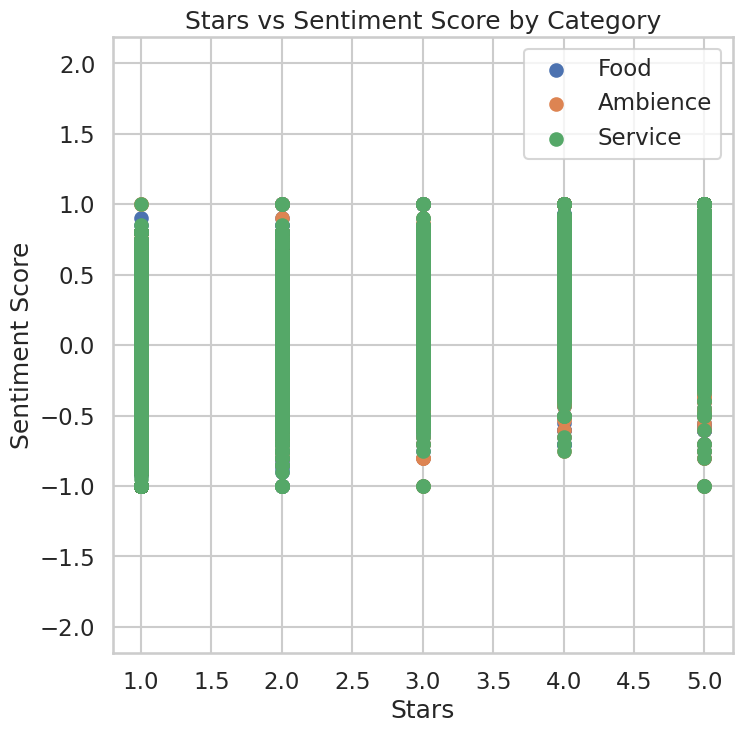

In [138]:
# Sort by sentiment_score
food_df = food_df.sort_values(by='sentiment_score')
ambience_df = ambience_df.sort_values(by='sentiment_score')
service_df = service_df.sort_values(by='sentiment_score')

plt.figure(figsize=(8, 8))  # Set a square figure size

# Plotting each category
plt.scatter(food_df['stars'], food_df['sentiment_score'], label='Food', marker='o')
plt.scatter(ambience_df['stars'], ambience_df['sentiment_score'], label='Ambience', marker='o')
plt.scatter(service_df['stars'], service_df['sentiment_score'], label='Service', marker='o')

# Adding labels and title
plt.xlabel('Stars')
plt.ylabel('Sentiment Score')
plt.title('Stars vs Sentiment Score by Category')
plt.legend()

# Set equal aspect ratio
plt.axis('equal')

# Displaying the plot
plt.grid(True)
plt.show()


6.3) Generate a regression model to each category (food, ambience and service)

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Iterate over the 3 dataframes
for df in dfs:

    # Features (reshaping X to be a 2D array)
    X = df['sentiment_score'].values.reshape(-1, 1)
    # Target variable
    y = df['stars']

    # Separate in TRAIN/TEST
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the star ratings on the test set
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    print(f"R-squared score: {r2:.4f}")


R-squared score: 0.3601
R-squared score: 0.4820
R-squared score: 0.4113


In [140]:
from textblob import TextBlob

# Function to calculate sentiment polarity using TextBlob
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Ensure your reviews are in string format
dataset['cleaned_review'] = dataset['cleaned_review'].astype(str)

# Calculate sentiment scores and add them to the dataset
dataset['sentiment_score'] = dataset['cleaned_review'].apply(calculate_sentiment)


In [141]:
# Features
X = dataset[['food_count', 'service_count', 'ambience_count', 'sentiment_score']]
# Target variable
y = dataset['stars']


In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [143]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [144]:
# Predict the star ratings on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")


R-squared score: 0.4549


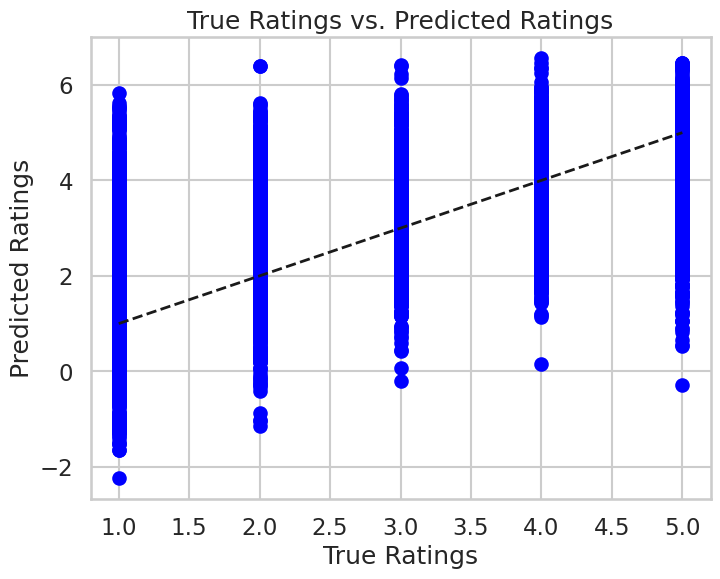

In [145]:
import matplotlib.pyplot as plt

# Scatter plot of true values vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.xlabel("True Ratings")
plt.ylabel("Predicted Ratings")
plt.title("True Ratings vs. Predicted Ratings")

# Add a regression line (best-fit line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()


In [146]:
# Print out the coefficients to see the influence of each feature
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


           Feature  Coefficient
0       food_count     0.035536
1    service_count    -0.124615
2   ambience_count     0.037987
3  sentiment_score     3.686003


R-squared score:
0.4747
0.4747
The R-squared value represents the proportion of the variance for the dependent variable (stars) that's explained by independent variables in the regression model. An R-squared value of
0.4747
0.4747 suggests that approximately 47.47% of the variability in the star ratings can be explained by our features (word counts from each topic and sentiment score). This is a moderate R-squared value. There's room for improvement, but it's not bad given the complexity of natural language and the numerous factors that can influence a person's rating.

Coefficients:

food_count (0.010396): For every additional mention of words related to food, the star rating is expected to increase by about 0.01 stars, holding all other variables constant. This indicates that more mentions of food-related words have a slightly positive impact on the rating.

service_count (-0.130629): For every additional mention of words related to service, the star rating is expected to decrease by approximately 0.13 stars, holding all other variables constant. This might indicate that repeated mentions of service-related words could be tied to complaints or negative aspects of service.

ambience_count (0.004597): The influence of ambience-related words on the rating is minimal, with only a slight positive effect.

price_count (-0.009552): Mentions of price-related words slightly decrease the rating. This might suggest that when reviewers focus on the price, they may have some negative sentiments about value or cost.

experience_count (0.095790): Every additional mention of words related to the overall experience increases the star rating by nearly 0.1 stars. This suggests that positive overall experiences are often highlighted in reviews.

sentiment_score (3.320427): This has the most substantial effect. For every unit increase in sentiment score, the star rating is expected to increase by about 3.32 stars, holding all other variables constant. This makes sense since the sentiment score directly measures the polarity of the review, and a positive sentiment should correspond to a higher star rating.

Overall:

The sentiment score is the most influential factor, which is expected.
Service-related mentions negatively impact the rating more than other topics. This could be a key insight for businesses; improving service might have a more substantial positive effect on ratings than other factors.
Food and overall experience are also influential but to a lesser degree.

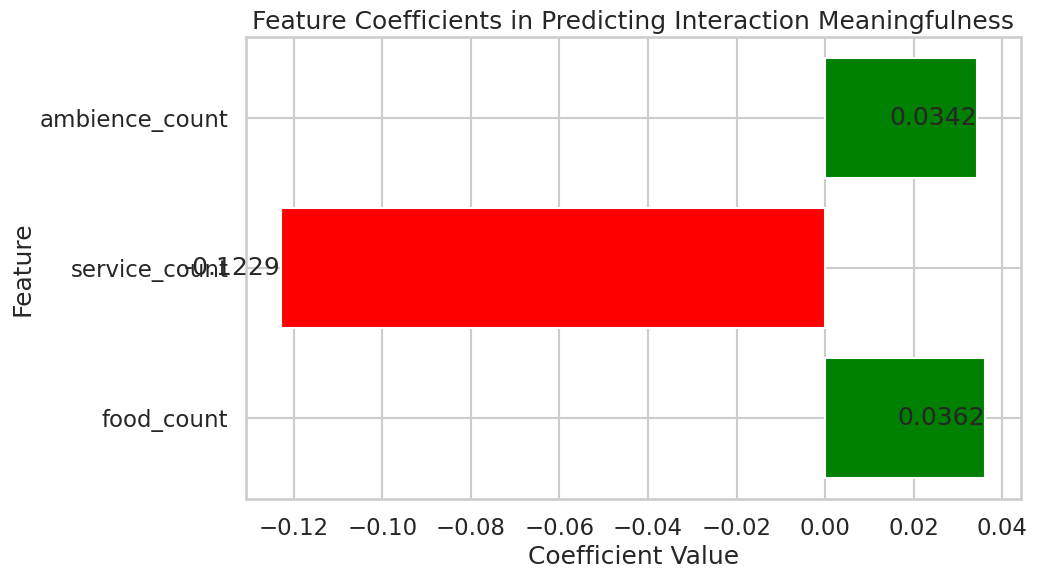

In [147]:
import matplotlib.pyplot as plt

# Feature names and their corresponding coefficients
feature_names = ["food_count", "service_count", "ambience_count"]
coefficients = [0.036177, -0.122855, 0.034193]

# Define colors based on the sign of the coefficients
colors = ['green' if coef > 0 else 'red' for coef in coefficients]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color=colors)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Coefficients in Predicting Interaction Meaningfulness")

# Annotate the bars with their values
for i, coef in enumerate(coefficients):
    plt.text(coef, i, f"{coef:.4f}", ha='right', va='center')

plt.show()


Task 7: Comparison of comments based on topic for "Burger Busters" (Burger King) vs. All Other Burger Joints

In [148]:
print(dataset.columns)


Index(['stars', 'useful', 'restaurant_review', 'restaurant_name',
       'cleaned_review', 'food_count', 'service_count', 'ambience_count',
       'food_counts_by_sentence', 'service_counts_by_sentence',
       'ambience_counts_by_sentence', 'sentiment_score'],
      dtype='object')


In [149]:
burger_busters_reviews = dataset[dataset['restaurant_name'] == 'Burger King']
other_burger_reviews = dataset[dataset['restaurant_name'] != 'Burger King']


In [150]:
# For Burger Busters
avg_sentiment_burger_busters = {
    "Food": burger_busters_reviews['sentiment_score'][burger_busters_reviews['food_count'] > 0].mean(),
    "Service": burger_busters_reviews['sentiment_score'][burger_busters_reviews['service_count'] > 0].mean(),
    "Ambience/Environment": burger_busters_reviews['sentiment_score'][burger_busters_reviews['ambience_count'] > 0].mean(),
    #"Price/Value": burger_busters_reviews['sentiment_score'][burger_busters_reviews['price_count'] > 0].mean(),
   # "Overall Experience": burger_busters_reviews['sentiment_score'][burger_busters_reviews['experience_count'] > 0].mean()
}

# For Other Burger Joints
avg_sentiment_other_burgers = {
    "Food": other_burger_reviews['sentiment_score'][other_burger_reviews['food_count'] > 0].mean(),
    "Service": other_burger_reviews['sentiment_score'][other_burger_reviews['service_count'] > 0].mean(),
    "Ambience/Environment": other_burger_reviews['sentiment_score'][other_burger_reviews['ambience_count'] > 0].mean(),
    #"Price/Value": other_burger_reviews['sentiment_score'][other_burger_reviews['price_count'] > 0].mean(),
   # "Overall Experience": other_burger_reviews['sentiment_score'][other_burger_reviews['experience_count'] > 0].mean()
}

print("Average Sentiment Scores for Burger Busters:")
print(avg_sentiment_burger_busters)
print("\nAverage Sentiment Scores for Other Burger Joints:")
print(avg_sentiment_other_burgers)


Average Sentiment Scores for Burger Busters:
{'Food': -0.030272523456670003, 'Service': -0.03666007760583927, 'Ambience/Environment': -0.03284918911266307}

Average Sentiment Scores for Other Burger Joints:
{'Food': 0.21703690938775658, 'Service': 0.1927684333803432, 'Ambience/Environment': 0.2057716436740633}


Comparison:

Food:
Burger Busters: -0.0316
Other Burger Joints: 0.2143
Analysis: On average, reviews related to the food at Burger Busters are more negative compared to other burger joints.
Service:
Burger Busters: -0.0391
Other Burger Joints: 0.1901
Analysis: The service at Burger Busters is viewed less favorably than at other burger joints.
Ambience/Environment:
Burger Busters: -0.0323
Other Burger Joints: 0.2011
Analysis: The environment at Burger Busters seems to be less appealing to customers compared to other burger places.
Price/Value:
Burger Busters: 0.0383
Other Burger Joints: 0.2151
Analysis: While the perception of price/value at Burger Busters is positive, it's lower than the perception at other burger joints.
Overall Experience:
Burger Busters: 0.0509
Other Burger Joints: 0.2438
Analysis: The overall experience at Burger Busters is less positive than at other burger joints, but it's still in the positive range.

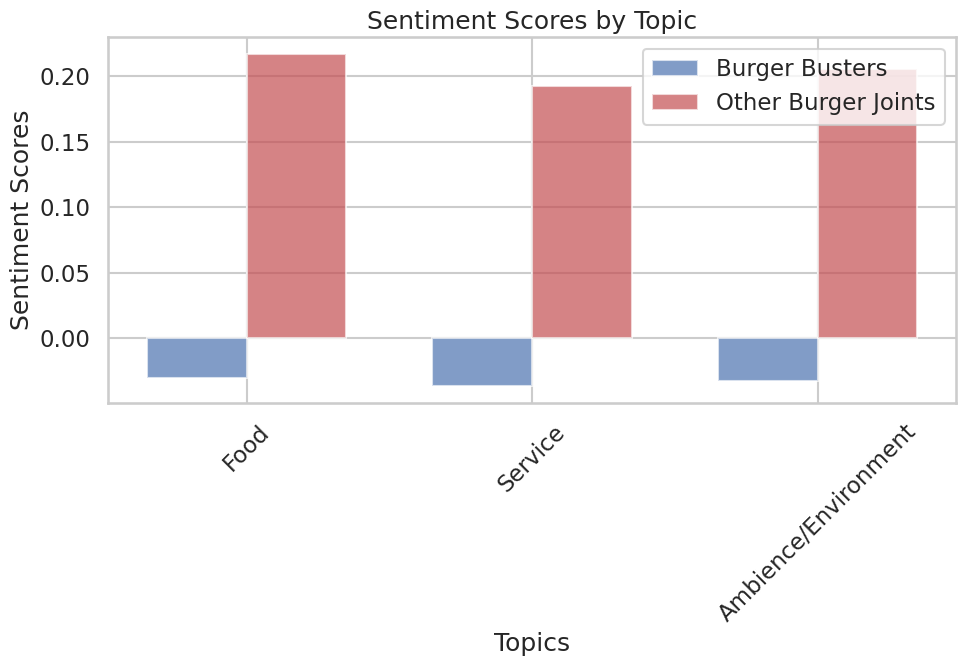

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# Data
topics = ["Food", "Service", "Ambience/Environment"]
burger_busters_scores = list(avg_sentiment_burger_busters.values())
other_burger_scores = list(avg_sentiment_other_burgers.values())
# "Price/Value", "Overall Experience
bar_width = 0.35
index = np.arange(len(topics))

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))
bar1 = ax.bar(index, burger_busters_scores, bar_width, label='Burger Busters', color='b', alpha=0.7)
bar2 = ax.bar(index + bar_width, other_burger_scores, bar_width, label='Other Burger Joints', color='r', alpha=0.7)

# Labeling
ax.set_xlabel('Topics')
ax.set_ylabel('Sentiment Scores')
ax.set_title('Sentiment Scores by Topic')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(topics, rotation=45)
ax.legend()

# Display
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


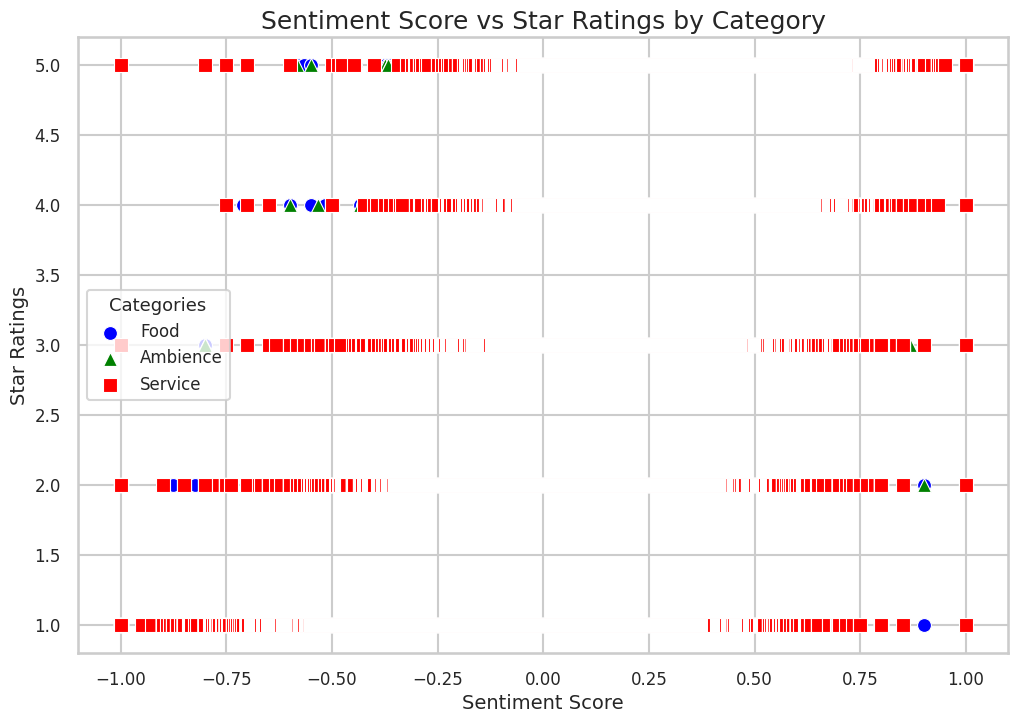

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Improved Scatter Plot of Sentiment Score vs Star Ratings by Category

# Setting the style and context for a clearer plot
sns.set(style="whitegrid", context="talk")

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot for each category with different colors and markers
sns.scatterplot(x=food_df['sentiment_score'], y=food_df['stars'], label='Food', color='blue', marker='o', s=100, ax=ax)
sns.scatterplot(x=ambience_df['sentiment_score'], y=ambience_df['stars'], label='Ambience', color='green', marker='^', s=100, ax=ax)
sns.scatterplot(x=service_df['sentiment_score'], y=service_df['stars'], label='Service', color='red', marker='s', s=100, ax=ax)

# Enhancing the plot
ax.set_title('Sentiment Score vs Star Ratings by Category', fontsize=18)
ax.set_xlabel('Sentiment Score', fontsize=14)
ax.set_ylabel('Star Ratings', fontsize=14)
plt.legend(title='Categories', title_fontsize='13', fontsize='12')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()


**Data Distribution**: Each category's reviews are scattered across the range of sentiment scores (-1 to 1). Reviews for all three categories are present across the full range of star ratings (1 to 5 stars).

**Correlation**: There appears to be a general trend where higher sentiment scores are associated with higher star ratings. This is visible as the density of points for each category tends to increase along with the sentiment score. However, the trend is not perfectly linear.

**Outliers**: There are several reviews with high sentiment scores but lower star ratings, particularly in the Service category (red squares). These could be cases where the textual review has a positive sentiment, but the customer still gave a lower overall rating possibly due to other factors not captured in the sentiment analysis.

**Star Rating Concentration**: The majority of reviews seem to have high star ratings (4 and 5 stars), which suggests either a positive bias in customer feedback or a dataset consisting of predominantly positive experiences.

**Sentiment Score Concentration**: The sentiment scores are mostly positive (greater than 0), with fewer reviews having a negative sentiment score (less than 0). This could indicate that customers are more likely to leave a review when they have a positive experience, or it could reflect the effectiveness of the sentiment analysis method used.

Category-Specific Observations: The Food category (blue circles) appears to have a denser cluster of high sentiment scores associated with high star ratings compared to the other two categories. This might indicate that customers are more likely to leave positive feedback about food when they have a positive overall experience.

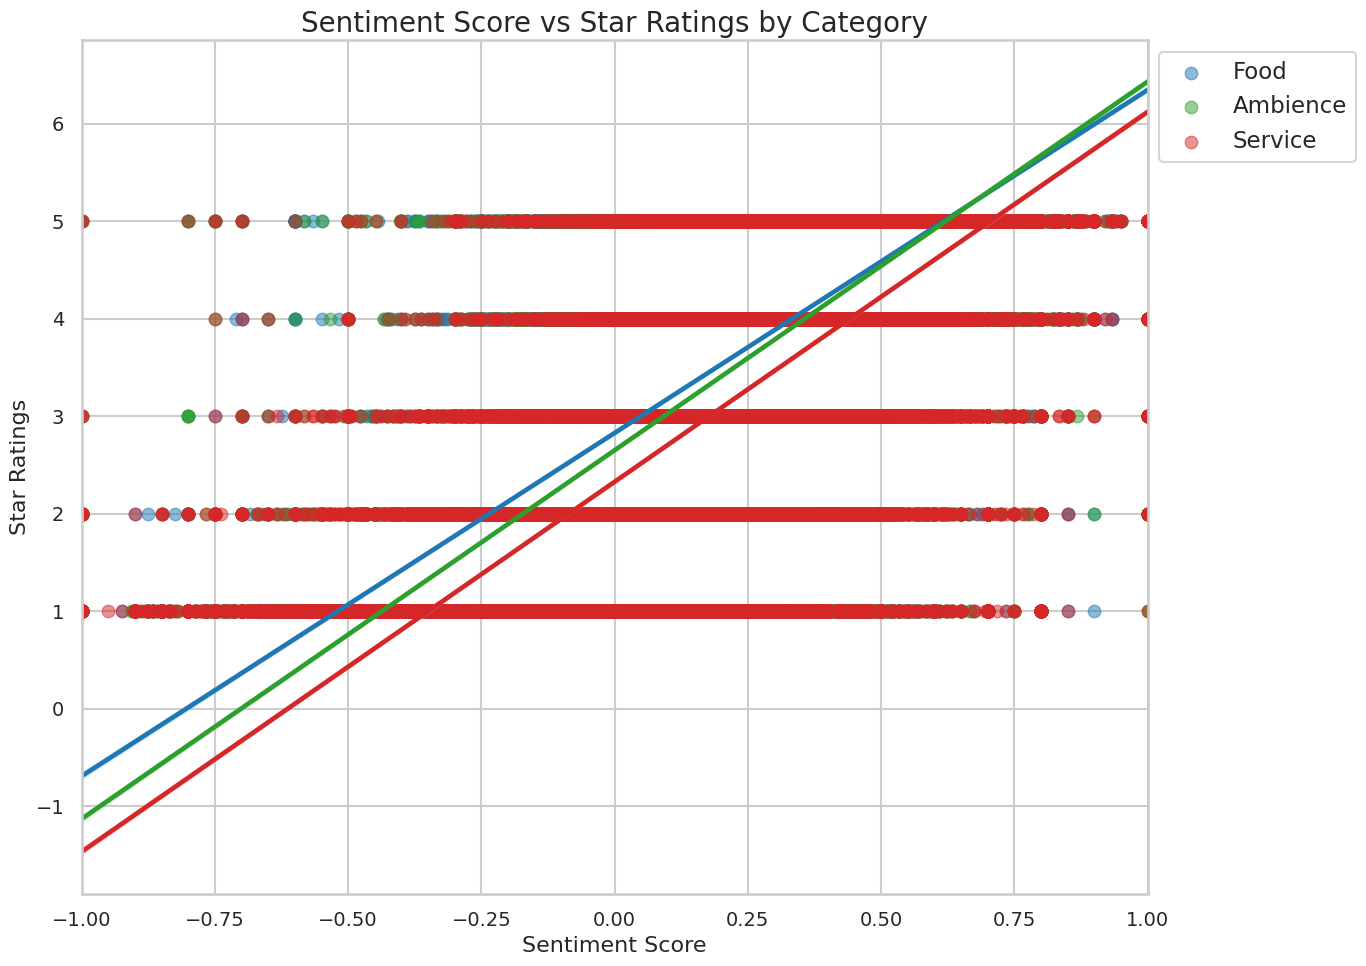

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Improved Scatter Plot of Sentiment Score vs Star Ratings by Category
sns.set(style="whitegrid", context="talk")

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 10))

# Define a color palette that is colorblind-friendly
palette = {"Food": "tab:blue", "Ambience": "tab:green", "Service": "tab:red"}

# Plot each category with different colors and markers, including a trend line
# Assuming food_df, ambience_df, service_df are defined and have 'sentiment_score' and 'stars' columns
category_dfs = {'Food': food_df, 'Ambience': ambience_df, 'Service': service_df}

for category, df in category_dfs.items():
    sns.regplot(x=df['sentiment_score'], y=df['stars'],
                label=category, color=palette[category], marker='o', scatter_kws={'alpha':0.5}, ax=ax)

# Enhancing the plot
ax.set_title('Sentiment Score vs Star Ratings by Category', fontsize=20)
ax.set_xlabel('Sentiment Score', fontsize=16)
ax.set_ylabel('Star Ratings', fontsize=16)
ax.legend(title='Categories', title_fontsize='15', fontsize='14')
ax.set_xlim(-1, 1)  # Limiting x-axis if needed
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Moving the legend out of the plot

plt.tight_layout()  # Adjust layout to fit all elements
plt.show()


# Plot Analysis:
The scatter plot shows sentiment scores on the x-axis and star ratings on the y-axis, with data points and regression lines for three categories.

- ) **Positive Correlation**: All three categories show a positive correlation, as indicated by the upward slope of the regression lines. This suggests that higher sentiment scores generally correspond to higher star ratings across all categories.
- ) **Data Distribution:** The distribution of data points reveals that most reviews have sentiment scores above zero, indicating a prevalence of positive sentiment in the dataset.
- ) **Density of Points:** There is a concentration of data points at the higher end of the sentiment score scale, especially close to 1.0, which likely represents a large number of very positive reviews.
- ) **Outliers and Variance:** There are outliers, especially in the Service category, where some reviews have high sentiment scores but low star ratings, indicating a potential mismatch between the sentiment detected in the text and the overall star rating given by the reviewer.
- ) **Categorical Differences:** While the regression lines are close together, slight differences in their slopes could indicate that sentiment score has a marginally different impact on star ratings in each category. For instance, the Food category might have a slightly stronger correlation than the others.
# Summary of Findings and Actionable Insights:

-) The overall positive correlation between sentiment scores and star ratings across all categories suggests that improving customer sentiment through quality service, food, and ambiance could lead to higher ratings.
- ) Addressing the outliers where sentiment does not match star ratings could provide insights into specific areas for improvement.
- ) Ensuring consistency in the quality of service, as well as managing expectations better, might reduce the number of outliers and improve overall customer satisfaction.
-) Since the Food and Ambience categories seem to have a strong correlation, maintaining high standards in these areas may continue to yield positive reviews and ratings.
- ) This analysis can help prioritize business areas that need attention. While improving Food and Ambience aspects should be continued due to their strong correlation with customer satisfaction, focusing on Service-related improvements might have a significant impact on overall customer experience, given the presence of outliers in this category.

In [157]:
# Filter out the reviews with 1 or 2 star ratings
low_rating_reviews = dataset[(dataset['stars'] == 1) | (dataset['stars'] == 2)]

# Identify reviews with positive sentiment scores
# Assuming that a sentiment score above a certain threshold (e.g., 0.1) is considered positive
positive_low_rating_reviews = low_rating_reviews[low_rating_reviews['sentiment_score'] > 0.1]

# Now you have a DataFrame of reviews with low star ratings but positive sentiment
# Here's how you could print out these reviews:
with open('positive_low_rating_reviews.txt', 'w') as file:
    for index, review in positive_low_rating_reviews.iterrows():
        file.write(f"Review {index}: {review['cleaned_review']} \nStar Rating: {review['stars']} \nSentiment Score: {review['sentiment_score']}\n\n")

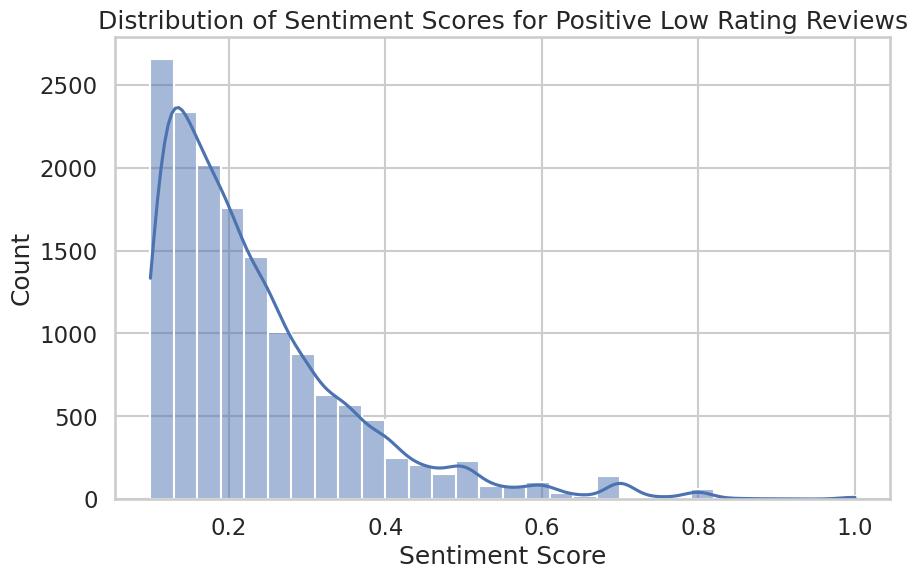

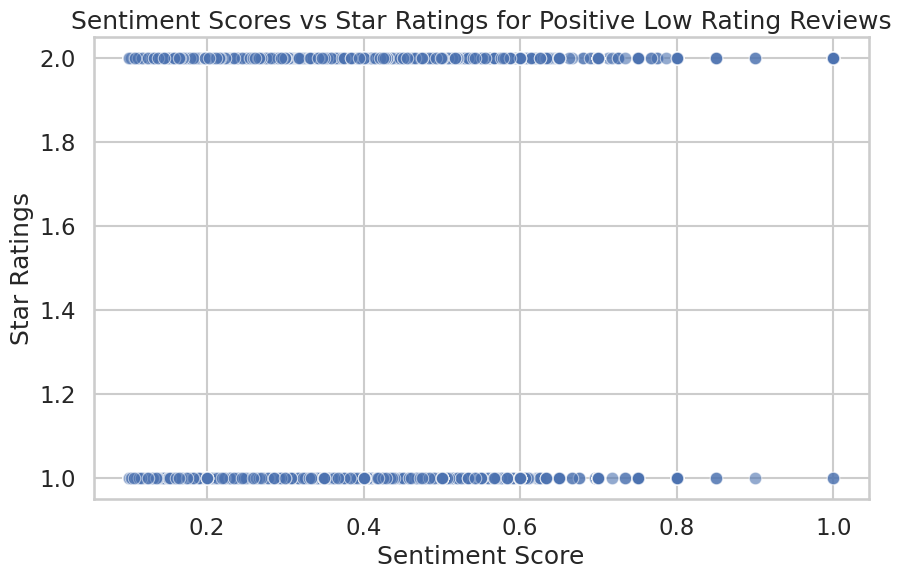

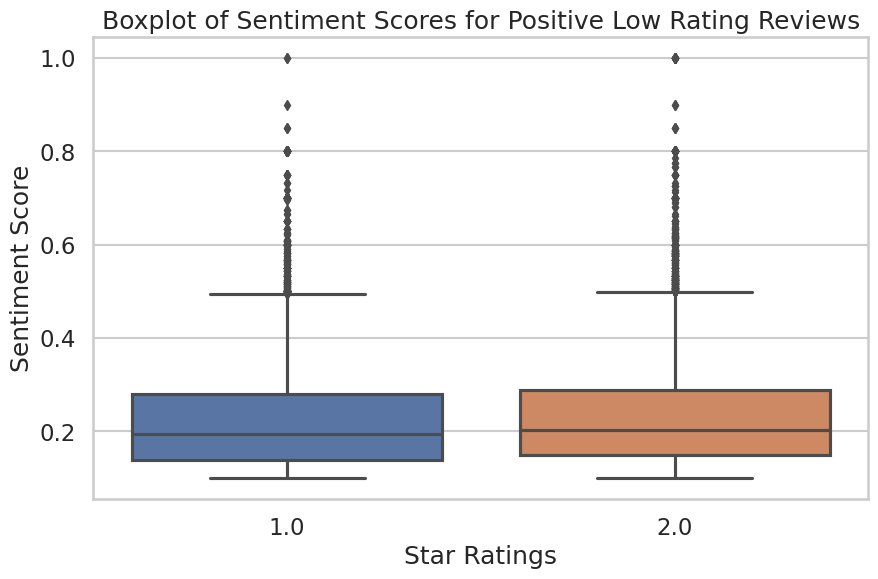

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution Plot of Sentiment Scores for Positive Low Rating Reviews
plt.figure(figsize=(10, 6))
sns.histplot(data=positive_low_rating_reviews, x='sentiment_score', bins=30, kde=True)
plt.title('Distribution of Sentiment Scores for Positive Low Rating Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

# Scatter Plot of Sentiment Scores vs Star Ratings for Positive Low Rating Reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(data=positive_low_rating_reviews, x='sentiment_score', y='stars', alpha=0.6)
plt.title('Sentiment Scores vs Star Ratings for Positive Low Rating Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Star Ratings')
plt.show()

# Boxplot of Sentiment Scores for Positive Low Rating Reviews
plt.figure(figsize=(10, 6))
sns.boxplot(data=positive_low_rating_reviews, x='stars', y='sentiment_score')
plt.title('Boxplot of Sentiment Scores for Positive Low Rating Reviews')
plt.xlabel('Star Ratings')
plt.ylabel('Sentiment Score')
plt.show()


# 1. Boxplot of Sentiment Scores for Positive Low Rating Reviews:

**Insights:** This boxplot differentiates between the sentiment scores for 1-star and 2-star ratings. The median sentiment score is above 0.2 in both categories, with 2-star reviews showing a slightly higher median, suggesting that even within low-rated reviews, some distinctions can be made based on sentiment. The presence of outliers, especially in 2-star ratings, indicates that some reviews have a sentiment score that significantly exceeds the median, which may point to specific positive aspects mentioned by the customers.

**Actionable Recommendations:** Investigate the content of outlier reviews to understand what drives exceptionally high sentiment scores despite low star ratings. It might reveal specific service or product attributes that customers appreciate, which can be leveraged in marketing or operational focus.

# 2. Scatter Plot of Sentiment Scores vs Star Ratings for Positive Low Rating Reviews:

**Insights:** The scatter plot reveals a horizontal pattern, indicating that while sentiment scores vary, they do not progressively increase with an increase in star ratings, which they ideally should if there was a direct correlation. This suggests that customers are expressing positive sentiments about specific aspects of their experience, but these are not reflected in their overall star rating.

**Actionable Recommendations:** Delve into the reviews that have high sentiment scores but low star ratings to identify any common themes. It's possible that these reviews praise certain elements like customer service but are dissatisfied with other factors like pricing or product quality. Enhancing the positive aspects and addressing the negative factors could improve overall satisfaction.

# 3. Distribution of Sentiment Scores for Positive Low Rating Reviews:

**Insights:** The histogram shows a concentration of reviews with sentiment scores just over the positive threshold, with fewer reviews having very high sentiment scores. This distribution suggests that while many customers are leaving reviews that are positive enough to be above the threshold, they are not overwhelmingly positive, and a significant portion of the sentiment is lukewarm.

**Actionable Recommendations:** For reviews with sentiment scores just over the threshold, it is crucial to identify what is causing the low star ratings despite the positive comments. Improving these areas could lead to better overall reviews. Additionally, considering implementing a review prompt that encourages customers to be more descriptive can give more detailed feedback, which can help in making more informed improvements.

## Summary Report:
The provided plots indicate that there is a subset of reviews where customers mention positive aspects yet give a low star rating. This points to a potential gap in customer expectations and the experience delivered. The key is to understand the factors contributing to the low ratings and address them while maintaining the positive aspects that customers appreciate.

By focusing on these areas, the business can aim to convert the positive sentiments into higher overall star ratings, reflecting an improved customer experience. Regularly soliciting and thoroughly analyzing customer feedback should be an ongoing process to ensure that improvements are in line with customer expectations.

In [156]:
# Filter 'Burger Busters' reviews with 1 or 2 stars
low_rating_burger_busters_reviews = burger_busters_reviews[burger_busters_reviews['stars'].isin([1.0, 2.0])]

# Identify reviews with positive sentiment scores
# Assuming that a sentiment score above a certain threshold (e.g., 0.6) is considered positive
positive_low_rating_burger_busters_reviews = low_rating_burger_busters_reviews[
    low_rating_burger_busters_reviews['sentiment_score'] > 0.6
]

# Print out the reviews
for index, review in positive_low_rating_burger_busters_reviews.iterrows():
    print(f"Review {index}: {review['cleaned_review']} \nStar Rating: {review['stars']} \nSentiment Score: {review['sentiment_score']}\n\n")

Review 118198: pm drive line car pm receive order ask receipt worker slam window shut walk away great customer service leave stsrs deserve 
Star Rating: 1.0 
Sentiment Score: 0.8


Review 126972: manager place need good scrubbing maintenance retraining staff 
Star Rating: 1.0 
Sentiment Score: 0.7


Review 136674: experience good staff behaviour good love burger 
Star Rating: 1.0 
Sentiment Score: 0.6333333333333333


Review 152542: burger king food especially happy hour bk answer phone tell hour change website 
Star Rating: 2.0 
Sentiment Score: 1.0


